In [18]:
import numpy as np
from sklearn.metrics import r2_score
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


In [19]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize the data
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 0, Loss Train(MSE): 27955.438899219687, R2 Train: -3.527207489233013
,Loss Valid(MSE): 33447.38781954373, R2 Valid: -5.22129505940233
Epoch 1, Loss Train(MSE): 27406.90043155397, R2 Train: -3.4383751347169147
,Loss Valid(MSE): 32872.83377682533, R2 Valid: -5.1144266173401665
Epoch 2, Loss Train(MSE): 26507.556058367867, R2 Train: -3.2927319703807836
,Loss Valid(MSE): 31919.57313585815, R2 Valid: -4.937117831734298
Epoch 3, Loss Train(MSE): 24997.62078708055, R2 Train: -3.0482074507310557
,Loss Valid(MSE): 30299.37388422224, R2 Valid: -4.6357568509057705
Epoch 4, Loss Train(MSE): 22515.432911880718, R2 Train: -2.6462327373738734
,Loss Valid(MSE): 27592.51660909493, R2 Valid: -4.132274848570842
Epoch 5, Loss Train(MSE): 18833.978899813897, R2 Train: -2.0500444165687566
,Loss Valid(MSE): 23505.24875184191, R2 Valid: -3.372033138097888
Epoch 6, Loss Train(MSE): 14375.15702229085, R2 Train: -1.3279662596187043
,Loss Valid(MSE): 18413.99150560686, R2 Valid: -2.425046972151596
Epoch 7, 

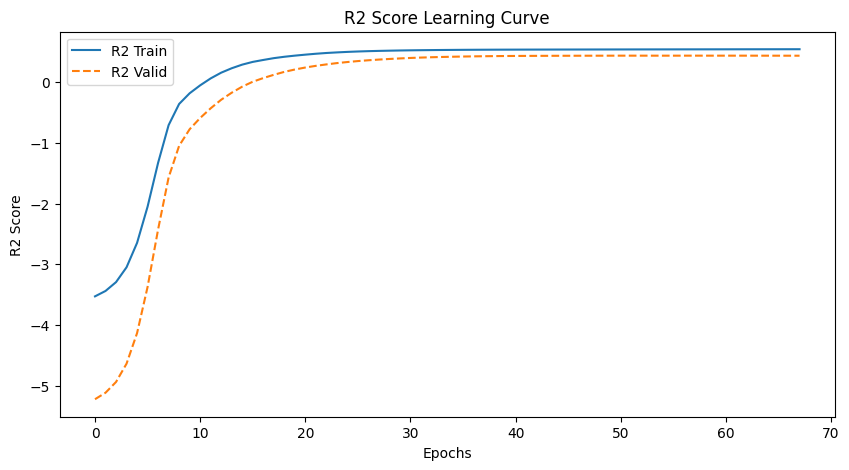

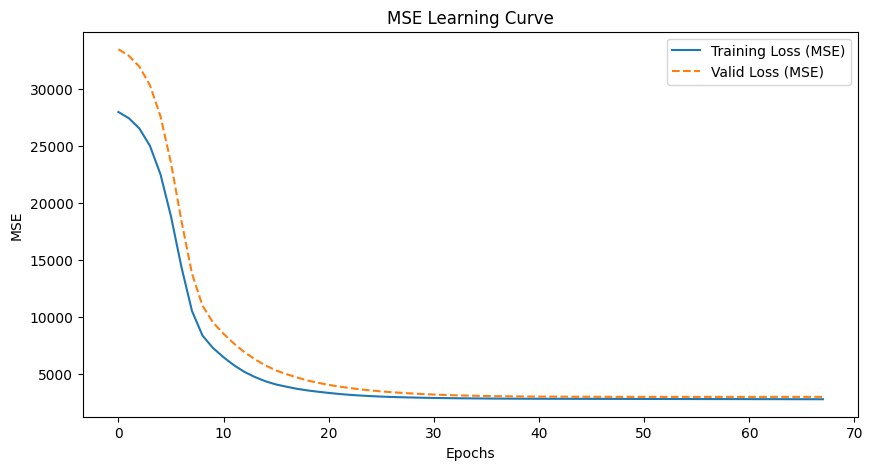

In [22]:
# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(10, 5, optimizer='adam'),
    ReLU(),
    DenseLayer(5, 1, optimizer='adam')
)
metrics = network.train(X_train, y_train, epochs=10000, learning_rate=0.001, loss='mse',patience=10)

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.show()

In [23]:
predicted= network.predict(X_test)
mse = network.compute_loss(predicted, y_test, "mse")
r2 = r2_score(y_test.flatten(), predicted.flatten())
print(f"MSE:{mse} \n R2:{r2}")

MSE:2832.2437608915166 
 R2:0.46542796519852414
